In [2]:
# import des bibliothèques Python utiles:
import numpy as np
import sklearn.linear_model as lm 
from sklearn import datasets,  metrics
import matplotlib.pyplot as plt

# "magic function" Jupyter pour l'affichage des graphiques dans le carnet:
%matplotlib inline



* chargement des données *

Nous utilisérons  le dataset  diabetes du logiciel scikitlearn

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

 Récupérez  ce jeu de données.
 
 Comprénez ce jeu de données. 
 
 Combien d'attributs  existe-il ("features")?
 
 Que représentent des attributs?
 
 Que représente l'étiquette ("target")?  S'agit-il des réels ou non?
 
 Combien de données existe-il?
 
 Mettez les données sur la variable X et les étiquettes sur la variable y. Attention les données qui sont dans .data ne sont pas toutes des attributs ("features")
 
 Affichez les 5 prémières données?

 Affichez les 5 premières étiquettes?


In [4]:
from sklearn.datasets import load_diabetes

# Charger le jeu de données diabetes
diabetes = load_diabetes()

# Nombre d'attributs ("features")
num_attributes = diabetes.data.shape[1]

# Attributs représentent les caractéristiques des patients liées au diabète
attributes_description = diabetes.feature_names
print("Les attributs (features) :"+str(attributes_description))

# L'étiquette ("target") représente une mesure quantitative de la progression de la maladie un an après le début de l'étude
# Il s'agit de valeurs réelles.
target_description = "HbA1c level"

# Nombre de données
num_samples = diabetes.data.shape[0]

# Mettre les données sur la variable X et les étiquettes sur la variable y
X = diabetes.data
y = diabetes.target

# Afficher les 5 premières données
print("Les 5 premières données (attributs/features) :")
print(X[:5])

# Afficher les 5 premières étiquettes
print("\nLes 5 premières étiquettes (valeurs réelles) :")
print(y[:5])

Les attributs (features) :['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Les 5 premières données (attributs/features) :
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]

Les 5 premières étiquettes (valeurs réelles) :
[151.  75. 141. 206. 135.]


Nous considérons seulement l'attribut l'IMC

On met de côté  les 50 dernières données  pour tester la qualité d'apprentissage. L'apprentissage sera fait sur le reste de données
 
Mettez les données d'apprentissage sur la variable X_train et les données de test sur X_test

Mettez les étiquettes de test sur y_test et celles d'apprentissage sur y_train

Affichez les 5 premiers  éléments de X_train et y_train

In [ ]:
X_train = X[:-50,2]
X_test = X[-50:,2]
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)
y_train = y[:-50]
y_test = y[-50:]

In [6]:
X_train = X[:-50,2]
X_test = X[-50:,2]
X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)
y_train = y[:-50]
y_test = y[-50:]

print("First 5 elements of X_train:")
print(X_train[:5])
print("\nFirst 5 elements of y_train:")
print(y_train[:5])


First 5 elements of X_train:
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]

First 5 elements of y_train:
[151.  75. 141. 206. 135.]


Proposez un modèle de régression linéaire pour prédire l'étiquette (y) en fonction de la valeur d'IMC (x):

y=ax+b

Affichez  les valeurs  de  a et b



In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

a = model.coef_[0]
b = model.intercept_


print("a =", a)
print("b =", b)


a = 945.4992184034703
b = 152.3348981915315


Mettez les prédictions pour les données  X_test sur le vecteur y_pred_test

Dessinez la figure  où l'axe x  est les données X_test, l'axe y est les étiquettes. Sur cette figure desssinez  2 courbes une pour y_test et une pour y_pred_test

A la vue des graphiques, pensez-vous que le modèle linéaire est bien adapté?



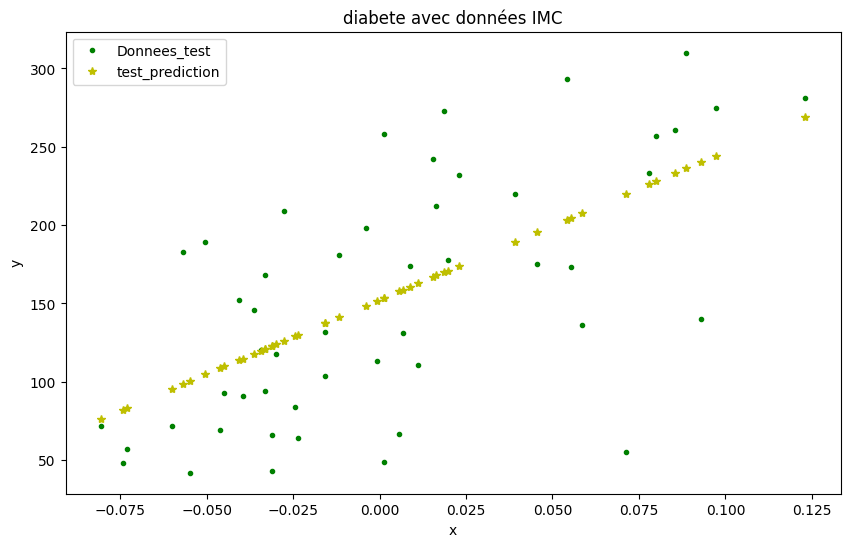

In [10]:
y_pred_test = model.predict(X_test)
# représentation graphique:
plt.figure(figsize=(10,6))
plt.plot(X_test, y_test, '.g')
plt.plot(X_test, y_pred_test, '*y')
plt.xlabel("x")
plt.ylabel("y")
plt.title('diabete avec données IMC')
plt.legend(["Donnees_test","test_prediction"]);
plt.show()



Calculez l'erreur MSE, r2score sur les données  de test. 


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)

r2 = r2_score(y_test, y_pred_test)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 3471.9231960569664
R2 Score: 0.4127592650680365


Faites la regression  par la méthode de descente de gradient stochastique 
en prenant max_iter=10000, tol=1e-3

#from sklearn.linear_model import SGDRegressor

#sgd = SGDRegressor(max_iter=10000, tol=1e-3)


Calculez l'erreur MSE, r2score sur les données  de test. 

Dessinez la figure comme vous avez fait pour la méthode précédente

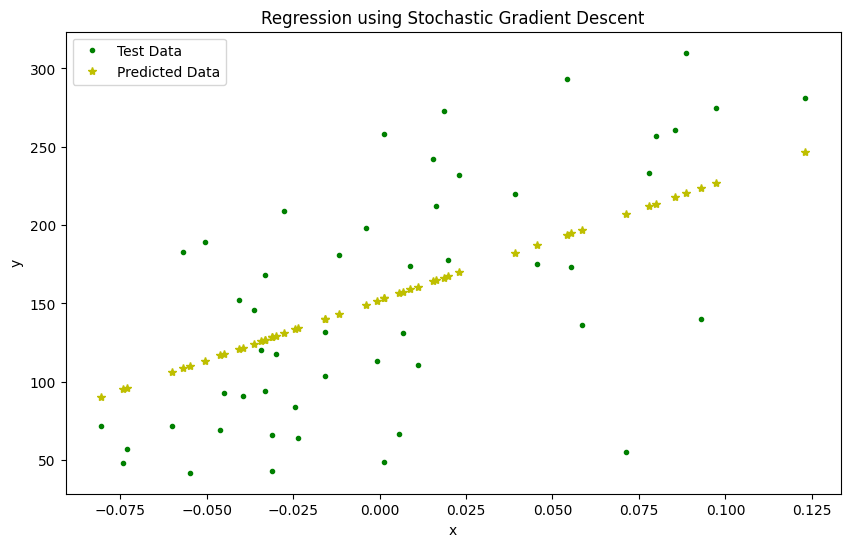

Mean Squared Error: 3579.701824689627
R2 Score: 0.3945295988242432


In [12]:
from sklearn.linear_model import SGDRegressor


sgd = SGDRegressor(max_iter=10000, tol=1e-3)


sgd.fit(X_train, y_train)


y_pred_test = sgd.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)

r2 = r2_score(y_test, y_pred_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, '.g')
plt.plot(X_test, y_pred_test, '*y')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Regression using Stochastic Gradient Descent')
plt.legend(["Test Data", "Predicted Data"])
plt.show()

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Vous utilisez la méthode de le plus proches voisins avec  k=1, k=2, k=3 pour faire la régression et comparez les MSE sur les données test. Quelle méthode donne le meilleur résultat pour cet ensemble de données d'apprentissage

#from sklearn.neighbors import KNeighborsRegressor

#reg1 = KNeighborsRegressor(n_neighbors=1)


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

reg1 = KNeighborsRegressor(n_neighbors=1)
reg2 = KNeighborsRegressor(n_neighbors=2)
reg3 = KNeighborsRegressor(n_neighbors=3)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

y_pred_test_1 = reg1.predict(X_test)
y_pred_test_2 = reg2.predict(X_test)
y_pred_test_3 = reg3.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred_test_1)
mse_2 = mean_squared_error(y_test, y_pred_test_2)
mse_3 = mean_squared_error(y_test, y_pred_test_3)

print("MSE for k=1:", mse_1)
print("MSE for k=2:", mse_2)
print("MSE for k=3:", mse_3)



MSE for k=1: 7448.52
MSE for k=2: 3926.485
MSE for k=3: 3687.24


 En utilisant 
 from sklearn.preprocessing import PolynomialFeatures
 vous faites la régression en prénant un polynôme de degré 7 puis de degré 10.
 
 Avez-vous trouvé de meilleurs résultats?
 
#from sklearn.preprocessing import PolynomialFeatures

#trans = PolynomialFeatures(degree=7)

#data_train = trans.fit_transform(X_train)

Vous faites l'apprentissage en prénant tous les attributs. Vous devez donc changér X_train, X_test

Vous faites les regressions avec

-regression linéaire

-descente de gradient stochastique

-le plus proches voisins k=1, k=2, k=3, k=4

Calculez les r2scores MSEs sur les données de test pour chacune des méthodes